In [19]:
%load_ext autoreload
import trafpy.generator as tpg
from trafpy.manager import Demand, RWA, SRPT, DCN
import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Demand config file imported.


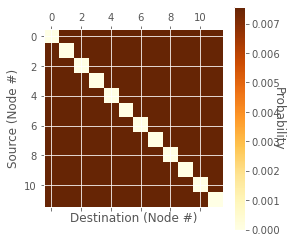

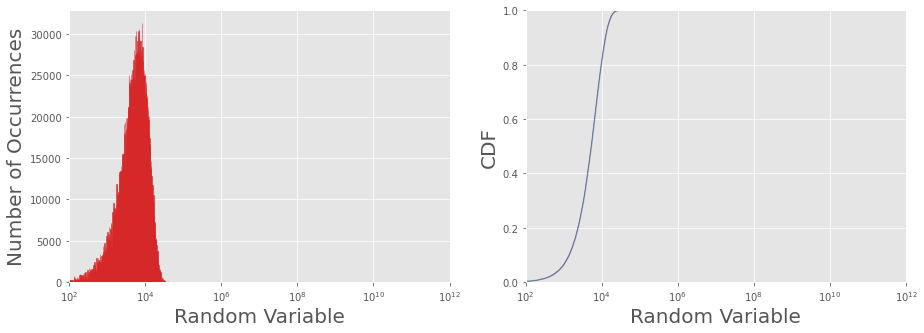

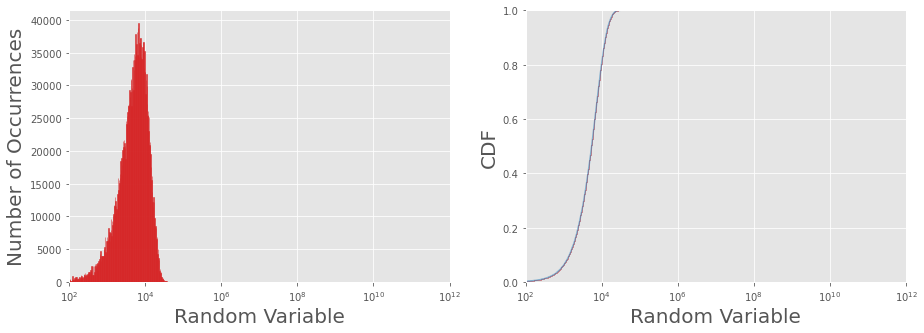

In [20]:
%autoreload
# DEFINE FLOW-CENTRIC DISTRIBUTIONS
node_dist = tpg.gen_uniform_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=False)

flow_size_dist, _ = tpg.gen_named_val_dist(dist='weibull',
                                       params={'_alpha': 1.4, '_lambda': 7000},
                                       show_fig=True,
                                       print_data=False,
                                       logscale=True,
                                       round_to_nearest=1,
                                       xlim=[1e2,1e12])

interarrival_time_dist, _ = tpg.gen_named_val_dist(dist='weibull',
                                       params={'_alpha': 1.4, '_lambda': 7000},
                                       show_fig=True,
                                       print_data=False,
                                       logscale=True,
                                       round_to_nearest=1,
                                       xlim=[1e2,1e12])

# interarrival_time_dist, _ = tpg.gen_named_val_dist(dist='lognormal',
#                                                params={'_mu': 7.4, '_sigma': 2},
#                                                show_fig=True,
#                                                print_data=False,
#                                                logscale=True,
#                                                xlim=[1e1,1e6])

In [21]:
%autoreload
# DEFINE NUM_DEMANDS BY NUM_DEMANDS
num_demands = 1000

flow_centric_demand_data = tpg.create_demand_data(num_demands=num_demands,
                                                  eps=config.ENDPOINT_LABELS,
                                                  node_dist=node_dist,
                                                  flow_size_dist=flow_size_dist,
                                                  interarrival_time_dist=interarrival_time_dist,
                                                  print_data=True)
print('Flow data:\n{}'.format(flow_centric_demand_data))

Generating 1000 flow demands...
Generated 1000 flow demands in 0.043657541275024414 seconds.
Flow data:
{'flow_id': array(['flow_0', 'flow_1', 'flow_2', 'flow_3', 'flow_4', 'flow_5',
       'flow_6', 'flow_7', 'flow_8', 'flow_9', 'flow_10', 'flow_11',
       'flow_12', 'flow_13', 'flow_14', 'flow_15', 'flow_16', 'flow_17',
       'flow_18', 'flow_19', 'flow_20', 'flow_21', 'flow_22', 'flow_23',
       'flow_24', 'flow_25', 'flow_26', 'flow_27', 'flow_28', 'flow_29',
       'flow_30', 'flow_31', 'flow_32', 'flow_33', 'flow_34', 'flow_35',
       'flow_36', 'flow_37', 'flow_38', 'flow_39', 'flow_40', 'flow_41',
       'flow_42', 'flow_43', 'flow_44', 'flow_45', 'flow_46', 'flow_47',
       'flow_48', 'flow_49', 'flow_50', 'flow_51', 'flow_52', 'flow_53',
       'flow_54', 'flow_55', 'flow_56', 'flow_57', 'flow_58', 'flow_59',
       'flow_60', 'flow_61', 'flow_62', 'flow_63', 'flow_64', 'flow_65',
       'flow_66', 'flow_67', 'flow_68', 'flow_69', 'flow_70', 'flow_71',
       'flow_72', 

In [22]:
%autoreload
# DEFINE NUM_DEMANDS BY NETWORK LOAD
network_load_config = {'network_rate_capacity': 6000, 'target_load_fraction': 0.75, 'disable_timeouts': True}

flow_centric_demand_data = tpg.create_demand_data(network_load_config=network_load_config,
                                                  eps=config.ENDPOINT_LABELS,
                                                  node_dist=node_dist,
                                                  flow_size_dist=flow_size_dist,
                                                  interarrival_time_dist=interarrival_time_dist,
                                                  print_data=False)
print('Flow data:\n{}'.format(flow_centric_demand_data))

Reconfiguring interarrival times and number of demands to match requested network load config...
Generating 3000 flow demands...
Generated 3000 flow demands in 0.032431840896606445 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.034914493560791016 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.031575918197631836 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.03331398963928223 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.033754587173461914 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.03480815887451172 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.03386664390563965 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.034163713455200195 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.03412222862243652 seconds.
Generating 3000 flow demands...
Generated 3000 flow demands in 0.03389

In [23]:
%autoreload
load_rate = tpg.get_flow_centric_demand_data_load_rate(flow_centric_demand_data)
print('Load rate: {} Gbps'.format(load_rate))

Load rate: 4478.611645077573 Gbps


In [24]:
%autoreload
_demand_data = flow_centric_demand_data
print('demand data:\n{}\n'.format(_demand_data))

network = tpg.gen_simple_network(ep_label=config.ENDPOINT_LABEL,num_channels=config.NUM_CHANNELS)
demand = Demand(demand_data=_demand_data)
slots_dict = demand.get_slots_dict(slot_size=1000)

network_capacity = network.graph['max_nw_capacity']
print('Network capacity: {} Gbps'.format(network_capacity))
print('Num slots: {}'.format(len(slots_dict.keys())))
# print('Slots dict:\n{}'.format(_slots_dict))

demand data:
{'flow_id': array(['flow_0', 'flow_1', 'flow_2', 'flow_3', 'flow_4', 'flow_5',
       'flow_6', 'flow_7', 'flow_8', 'flow_9', 'flow_10', 'flow_11',
       'flow_12', 'flow_13', 'flow_14', 'flow_15', 'flow_16', 'flow_17',
       'flow_18', 'flow_19', 'flow_20', 'flow_21', 'flow_22', 'flow_23',
       'flow_24', 'flow_25', 'flow_26', 'flow_27', 'flow_28', 'flow_29',
       'flow_30', 'flow_31', 'flow_32', 'flow_33', 'flow_34', 'flow_35',
       'flow_36', 'flow_37', 'flow_38', 'flow_39', 'flow_40', 'flow_41',
       'flow_42', 'flow_43', 'flow_44', 'flow_45', 'flow_46', 'flow_47',
       'flow_48', 'flow_49', 'flow_50', 'flow_51', 'flow_52', 'flow_53',
       'flow_54', 'flow_55', 'flow_56', 'flow_57', 'flow_58', 'flow_59',
       'flow_60', 'flow_61', 'flow_62', 'flow_63', 'flow_64', 'flow_65',
       'flow_66', 'flow_67', 'flow_68', 'flow_69', 'flow_70', 'flow_71',
       'flow_72', 'flow_73', 'flow_74', 'flow_75', 'flow_76', 'flow_77',
       'flow_78', 'flow_79', 'flow_8

12


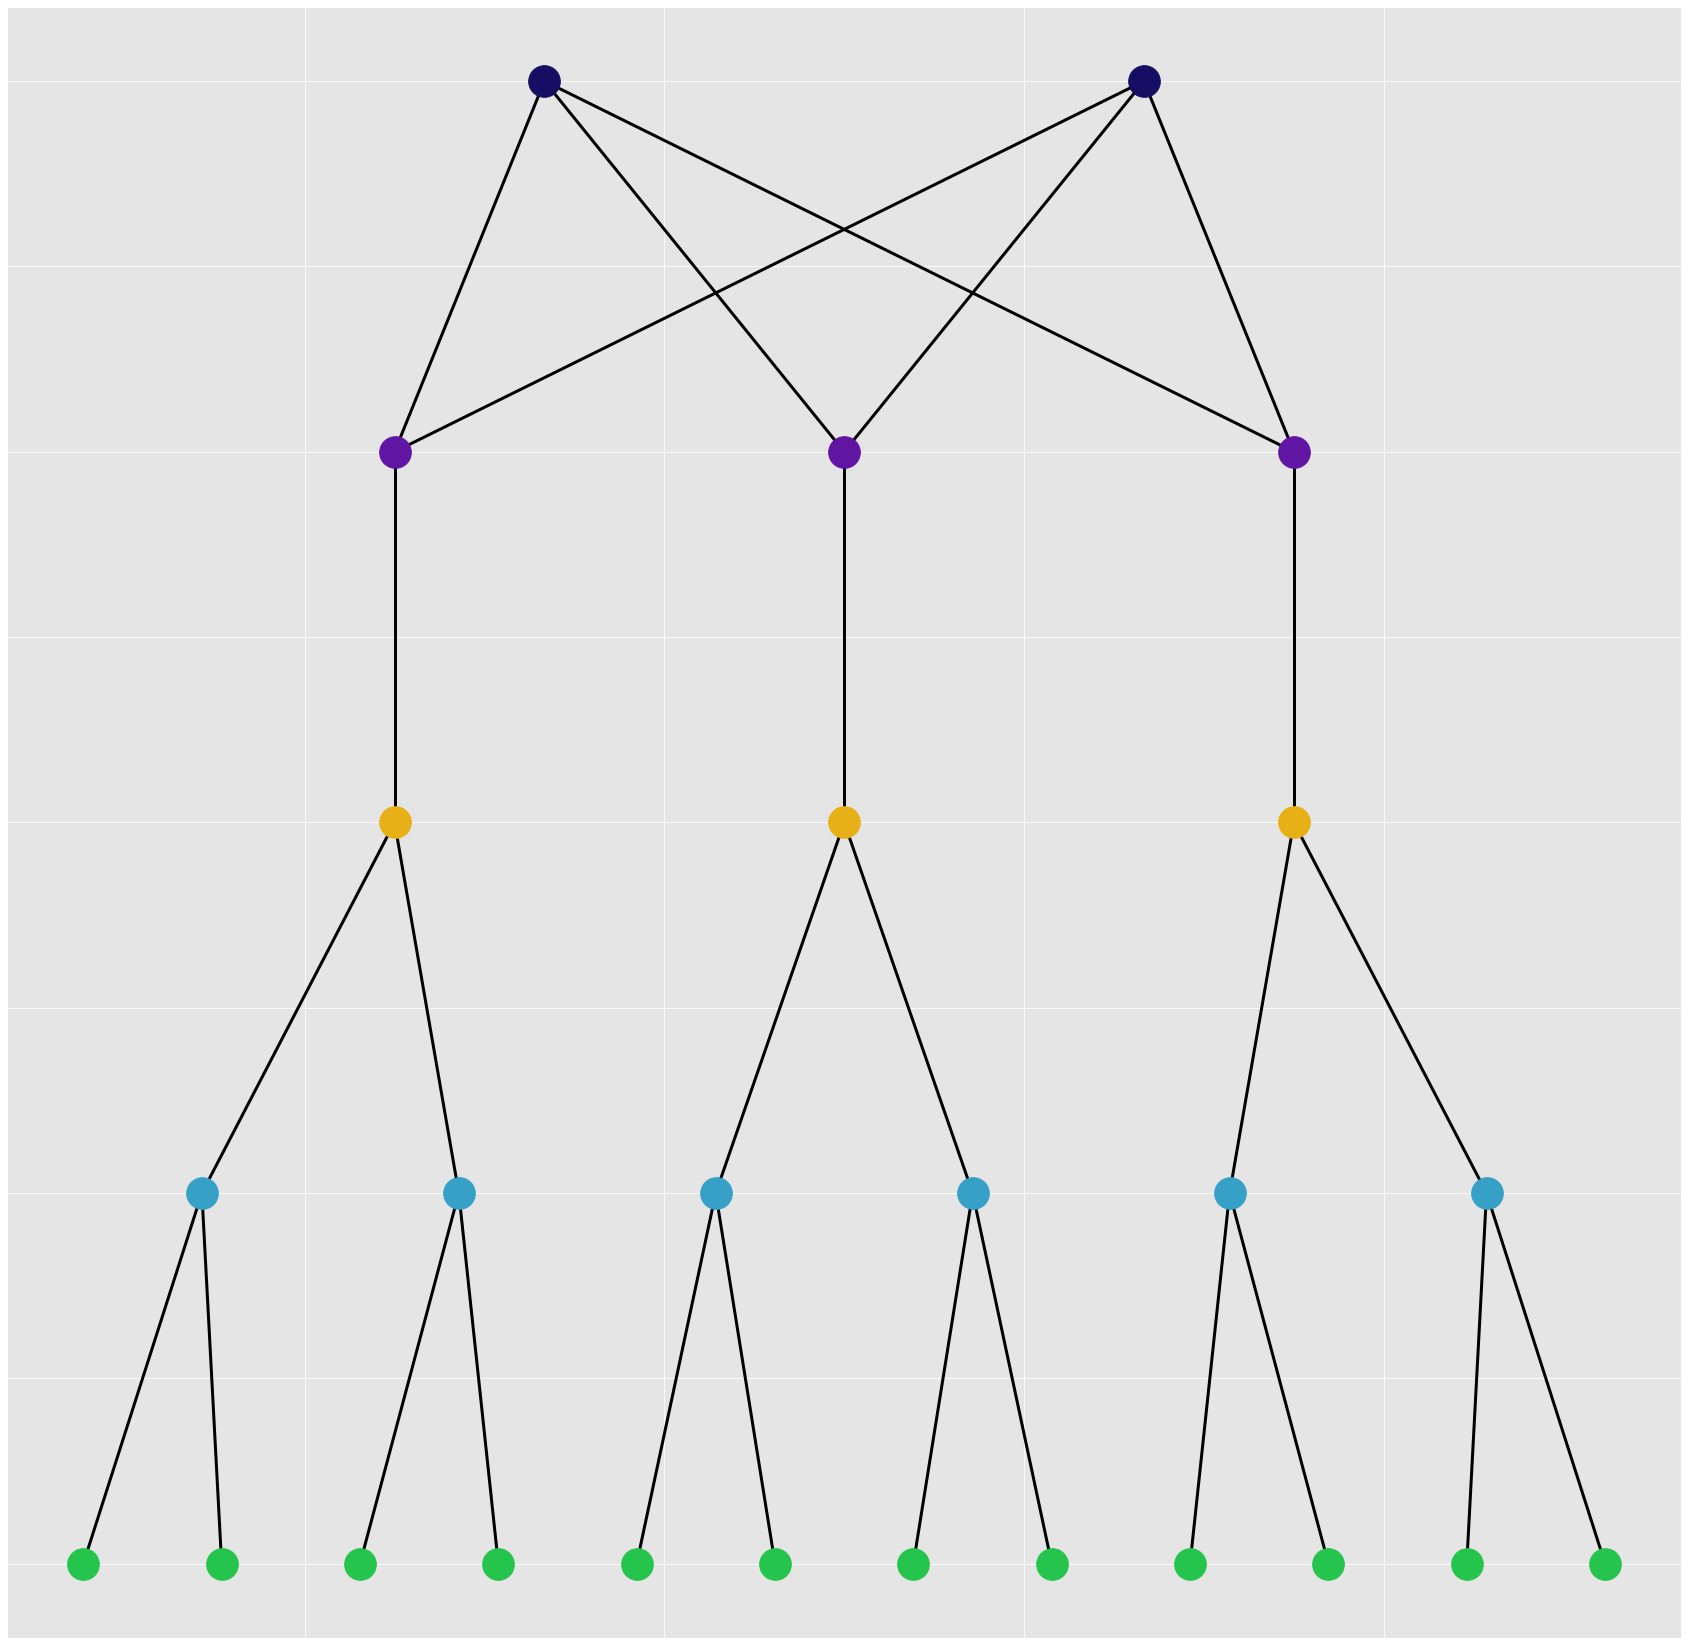

In [39]:
%autoreload
net = tpg.gen_fat_tree(k=3, 
                       N=2, 
                       num_channels=1, 
                       rack_to_edge_channel_capacity=5, 
                       edge_to_agg_channel_capacity=5,
                       agg_to_core_channel_capacity=5)
# net = tpg.gen_nsfnet_network(N=2)
print(net.graph['max_nw_capacity'])
fig = tpg.plot_network(net, draw_node_labels=False, network_node_size=1000, linewidths=1)

In [ ]:
%autoreload
import time

start = time.time()

rack_prob_config = {'racks_dict': net.graph['rack_to_ep_dict'], 'prob_inter_rack': 0.7}
# rack_prob_config = None

num_skewed_nodes = int(0.2 * len(net.graph['endpoints']))
skewed_node_probs = [0.55/num_skewed_nodes for _ in range(num_skewed_nodes)]
# num_skewed_pairs = int(0.1 * (len(net.graph['endpoints'])**2-len(net.graph['endpoints'])))

# node_dist, _ = tpg.gen_uniform_node_dist(net.graph['endpoints'], rack_prob_config=rack_prob_config, show_fig=True, print_data=False)
node_dist, _ = tpg.gen_multimodal_node_dist(net.graph['endpoints'], rack_prob_config=rack_prob_config, show_fig=True, print_data=False, num_skewed_nodes=num_skewed_nodes, skewed_node_probs = skewed_node_probs)
# node_dist, _ = tpg.gen_multimodal_node_dist(net.graph['endpoints'], rack_prob_config=rack_prob_config, show_fig=True, print_data=False)
# node_dist, _ = tpg.gen_multimodal_node_pair_dist(net.graph['endpoints'], rack_prob_config=rack_prob_config, show_fig=True, print_data=False, num_skewed_pairs=num_skewed_pairs)

end = time.time()
print('Time: {} s'.format(end-start))

In [ ]:
%autoreload
sn, dn = tpg.gen_node_demands(eps=net.graph['endpoints'], node_dist=node_dist, num_demands=5000, rack_prob_config=rack_prob_config)

# find total number of intra- & inter-rack requests
ep_to_rack = net.graph['ep_to_rack_dict']
inter_rack_counter = 0
intra_rack_counter = 0
for src, dst in zip(sn, dn):
    if ep_to_rack[src] == ep_to_rack[dst]:
        intra_rack_counter += 1
    else:
        inter_rack_counter += 1
total_counts = intra_rack_counter + inter_rack_counter
        
print('Total counts: {}'.format(total_counts))
print('Num intra rack comms: {} ({}%)'.format(intra_rack_counter, intra_rack_counter*100/total_counts))
print('Num inter rack comms: {} ({}%)'.format(inter_rack_counter, inter_rack_counter*100/total_counts))


# plot_dict= {'Intra-rack': {'x_values': ['Uni DCN', 'Private DCN', 'Cloud DCN'], 'y_values': [intra_rack_counter*100/total_counts, 40, 80]},
#             'Inter-rack': {'x_values': ['Uni DCN', 'Private DCN', 'Cloud DCN'], 'y_values': [inter_rack_counter*100/total_counts, 60, 20]}}
plot_dict= {'Intra-rack': {'x_values': ['Priv DCN'], 'y_values': [intra_rack_counter*100/total_counts]},
            'Inter-rack': {'x_values': ['Priv DCN'], 'y_values': [inter_rack_counter*100/total_counts]}}
tpg.plot_val_stacked_bar(plot_dict, ylabel='% Traffic', ylim=[0,100], show_fig=True)



In [ ]:
%autoreload
len(net.graph['endpoints'])
print(net.graph['max_nw_capacity'])

In [ ]:
%autoreload
import trafpy.generator as tpg
import numpy as np
import json

path_to_load = '../trafpy/benchmarker/versions/benchmark_v001/data/university/flow_size_dist.json'
dist = tpg.load_data_from_json(path_to_load)
print(type(dist))
print(type(json.loads(dist)))
# print(json.loads(dist))
# print(np.array(json.loads(dist)).shape)
# print(type(np.array(json.loads(dist))))

In [ ]:
%autoreload
import trafpy.generator as tpg
import json

path_to_load = '../data/benchmark_data/university_benchmark_data.json'
demand_data = json.loads(tpg.load_data_from_json(path_to_load))
print(type(demand_data))
print(demand_data)
